WELCOME TO NETFLIX DATA ANALYSIS

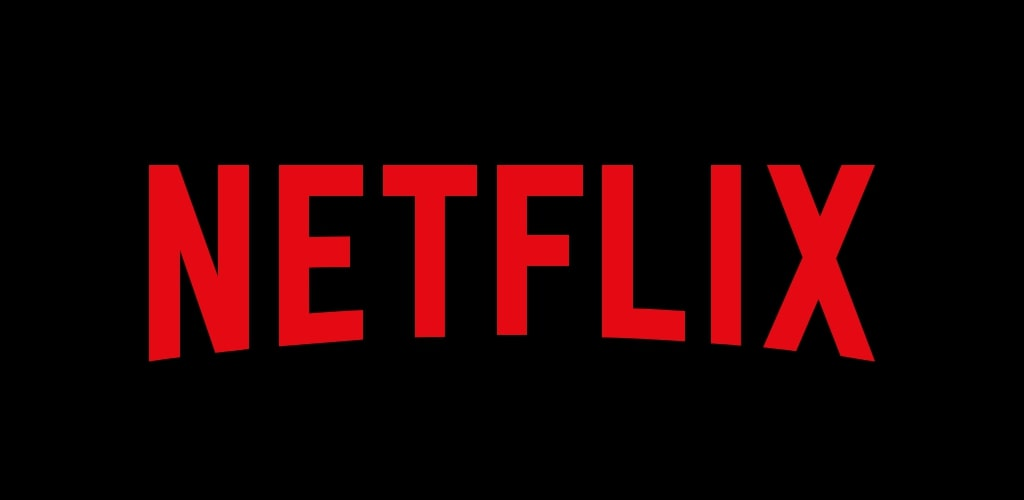

### Loading the File

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")



In [ ]:
netflix=pd.read_csv("netflix.csv")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


The Netflix dataset offers a diverse range of attributes that provide a comprehensive overview of the content available on the platform. These attributes include:

1. **Show ID**: A unique identifier for each show or movie.

2. **Type**: Distinguishes between movies and TV shows.

3. **Title**: The name of the show or movie.

4. **Director**: The director of the film or series. This field can be particularly insightful for understanding the creative influences behind different titles.

5. **Cast**: Lists the actors and actresses featured in the title. This attribute is valuable for analyzing star power and collaborations among actors.

6. **Country**: The country where the show or movie was produced. This attribute is useful for geographical analysis and understanding Netflix's global reach.

7. **Date Added**: The date when the title was added to the Netflix catalog. This information is crucial for temporal analysis, such as identifying trends in content addition over time.

8. **Release Year**: The year when the title was originally released. This attribute allows for historical trends analysis, such as changes in content types over time.

9. **Rating**: The audience rating (like TV-MA, PG-13) of the title. Ratings are key for understanding the target demographic and content maturity level.

10. **Duration**: The length of the movie or the number of seasons for TV shows. For movies, it’s typically in minutes, and for TV shows, in seasons.

11. **Listed In (Genre)**: The genres or categories the title is listed under. This field is vital for genre-based analysis and understanding the diversity of content.

12. **Description**: A brief summary of the title. While not quantifiable like other fields, it provides contextual information that can be used for text analysis.

This range of attributes enables a multifaceted analysis of the Netflix content library, including trend analysis, content strategy insights, demographic targeting, and much more. The dataset is well-suited for a variety of data analytics tasks, from simple descriptive statistics to more complex predictive models.

# Basic Data **Info**

In [ ]:
#Gathering basic information
data_shape = netflix.shape
data_types = netflix.dtypes
statistical_summary = netflix.describe(include='all')

data_shape

(8807, 12)

In [ ]:
data_types


In [ ]:

statistical_summary

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
# A concise summary of the Dataframe
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Finding the Rate of Missing Data

In [ ]:
# Finding  the rate of missing data
for i in netflix.columns:
    null_rate = netflix[i].isna().sum() / len(netflix) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

date_added null rate: 1.11%
duration null rate: 0.03%
week_number null rate: 1.11%
day_of_week_added null rate: 1.11%
year_added null rate: 1.11%
days_to_add null rate: 1.11%
release_to_add_gap null rate: 1.11%


In [ ]:
#Finding the number of nulls in the data
netflix.isnull().sum()

show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added            98
release_year           0
rating                 0
duration               3
listed_in              0
description            0
week_number           98
day_of_week_added     98
year_added            98
countries_list         0
release_date           0
days_to_add           98
release_to_add_gap    98
dtype: int64

### Stripping all Whitespaces

In [ ]:
# Stripping whitespaces from all columns
for column in netflix.columns:
    # Check if the column is of object type (string)
    if netflix[column].dtype == 'object':
        netflix[column] = netflix[column].str.strip()

# Displaying the first few rows after stripping whitespaces
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Number of Unique Movies and TV **Shows**

In [ ]:
# Counting the number of unique movies and TV shows
unique_movies = netflix[netflix['type'] == 'Movie']['title'].nunique()
unique_tv_shows = netflix[netflix['type'] == 'TV Show']['title'].nunique()

unique_movies, unique_tv_shows

(6129, 2675)

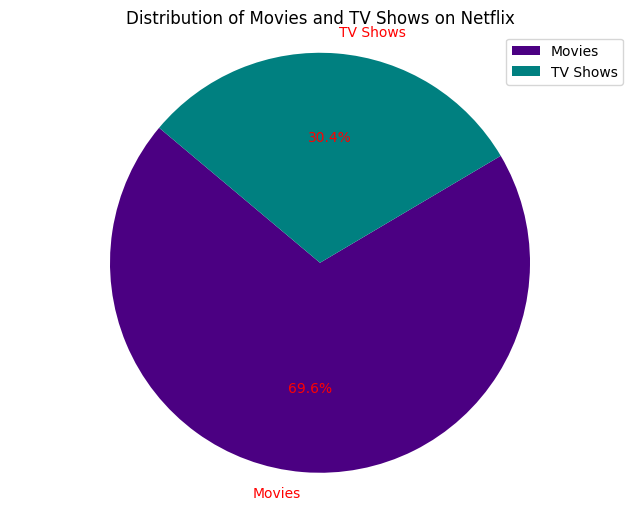

In [ ]:
import matplotlib.pyplot as plt

# Data for pie chart
labels = 'Movies', 'TV Shows'
sizes = [unique_movies, unique_tv_shows]
colors = ['indigo', 'teal']

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color':"red"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding title and legend
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.legend()

# Show the pie chart
plt.show()

**Content Strategy**: A larger number of movies might suggest that Netflix's content strategy leans more towards films. This could be because movies generally have a wider appeal, are often sought after for their star power, and can attract subscribers looking for well-known titles.

**Consumer Preferences**: The prevalence of movies could also indicate a response to consumer preferences. Subscribers might prefer shorter, one-off experiences provided by movies, as opposed to the longer commitment required by TV shows.

**Licensing and Production Costs**: Acquiring or producing movies might be more cost-effective for Netflix. TV shows generally require a longer investment both in terms of production and in maintaining viewer interest over several seasons.

**Turnover Rate**: Movies have a quicker turnover rate compared to TV shows. A movie is a one-time investment, and new movies can frequently be added to the library, offering fresh content. In contrast, TV shows take longer to produce and may not release new seasons as frequently.

**International Appeal**: Movies often have a broader international appeal due to their concise format and diverse genres. This could be a strategic move by Netflix to cater to its global audience.

###  Top 20 Most Frequent Words in all Unique Movie Titles

In [ ]:
from collections import Counter
import string

# Selecting only movie titles
movie_titles = netflix[netflix['type'] == 'Movie']['title']

# Combining all titles into a single string
all_titles = ' '.join(movie_titles)

# Removing punctuation and converting to lowercase
all_titles = all_titles.translate(str.maketrans('', '', string.punctuation)).lower()

# Splitting the string into words
words = all_titles.split()

# Counting the frequency of each word
word_counts = Counter(words)

# Getting the top 20 most frequent words
top_20_words = word_counts.most_common(20)

top_20_words

[('the', 1637),
 ('of', 505),
 ('a', 276),
 ('in', 222),
 ('and', 169),
 ('to', 148),
 ('2', 125),
 ('love', 105),
 ('my', 96),
 ('i', 80),
 ('for', 75),
 ('movie', 72),
 ('christmas', 72),
 ('man', 65),
 ('you', 64),
 ('on', 63),
 ('story', 62),
 ('life', 51),
 ('from', 50),
 ('world', 48)]

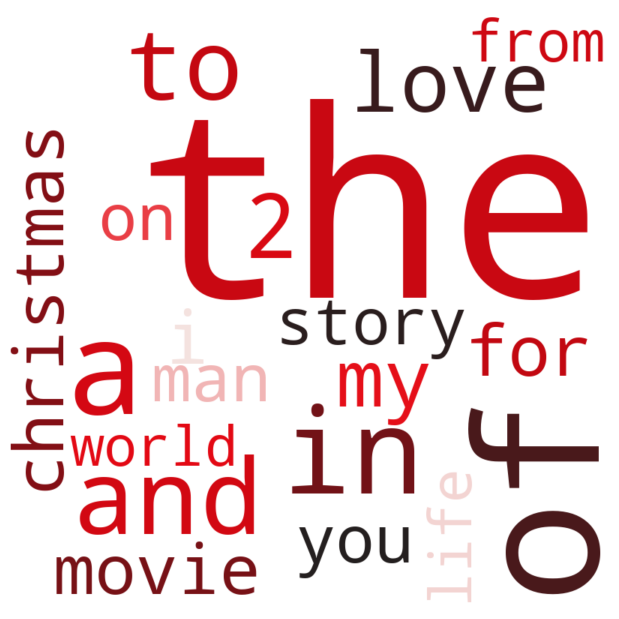

In [ ]:
# Visualizing the Top 20 Words seen in Movie Titles

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming top_20_words is a list of tuples (word, count)
top_20_dict = dict(top_20_words)

from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap from the color palette
colors = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']
custom_colormap = LinearSegmentedColormap.from_list("custom", colors)

# Create a WordCloud object with the custom colormap
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      colormap=custom_colormap,
                      min_font_size=10).generate_from_frequencies(top_20_dict)

# Plotting the WordCloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Popular Themes and Genres**: Words like "love," "man," "life," "world," and "story" indicate common themes and genres in movies. For example, "love" suggests a significant presence of romantic movies, while "man," "life," and "world" might indicate action, adventure, or drama genres focusing on personal stories or larger-than-life narratives.

**Target Audience and Content Style**: The presence of words like "Christmas hints at seasonal films centered around holidays.

**Cultural Influences**: The frequency of certain words can also reflect cultural influences or popular trends in filmmaking. For instance, the prevalence of "Christmas" might indicate a Western cultural influence or a focus on producing content that aligns with Western holidays and traditions.

**Sequels and Franchises**: The appearance of a number like "2" among the most frequent words suggests the presence of sequels and ongoing franchises in the Netflix library.

**Narrative Elements**: Words such as "story," "life," and "world" suggest a focus on narrative-driven content. They indicate that storytelling is a central element in many of the movies, potentially pointing to a preference for plot-rich films on Netflix.

### Best Week to Release a Movie / TV Show

In [ ]:
# Converting 'date_added' to datetime and extracting week number
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix['week_number'] = netflix['date_added'].dt.isocalendar().week

# Separating Movies and TV Shows
movies_data = netflix[netflix['type'] == 'Movie']
tv_shows_data = netflix[netflix['type'] == 'TV Show']

# Grouping by week number and counting unique titles for Movies
movies_weekly_count = movies_data.groupby('week_number')['title'].nunique().reset_index()

# Grouping by week number and counting unique titles for TV Shows
tv_shows_weekly_count = tv_shows_data.groupby('week_number')['title'].nunique().reset_index()

# Identifying the best week for releasing movies and TV shows
best_week_movies = movies_weekly_count.sort_values('title', ascending=False).iloc[0]
best_week_tv_shows = tv_shows_weekly_count.sort_values('title', ascending=False).iloc[0]

best_week_movies, best_week_tv_shows

(week_number      1
 title          316
 Name: 0, dtype: Int64,
 week_number    27
 title          85
 Name: 26, dtype: Int64)

**Seasonal Trends in Viewing Habits**:
The preference for releasing movies in the first week of the year and TV shows in the 27th week suggests a pattern in viewing habits. This could be influenced by seasonal factors like holidays, weather, and school vacations. For instance, the beginning of the year is often a holiday period, potentially leading to higher viewership and a greater audience for new movies. The 27th week, falling in mid-year, might coincide with summer breaks in many regions, increasing viewership for TV shows.

### Best Month to Release a Movie / TV Show

In [ ]:
# Filtering out TV shows and movies, creating independent copies
tv_shows_data = netflix[netflix['type'] == 'TV Show'].copy()
movies_data = netflix[netflix['type'] == 'Movie'].copy()

# Adding 'month' columns to both dataframes
movies_data['month'] = movies_data['date_added'].dt.month
tv_shows_data['month'] = tv_shows_data['date_added'].dt.month

# Grouping by month and counting unique titles for Movies
movies_monthly_count = movies_data.groupby('month')['title'].nunique().reset_index()

# Grouping by month and counting unique titles for TV Shows
tv_shows_monthly_count = tv_shows_data.groupby('month')['title'].nunique().reset_index()

# Identifying the best month for releasing movies and TV shows
best_month_movies = movies_monthly_count.sort_values('title', ascending=False).iloc[0]
best_month_tv_shows = tv_shows_monthly_count.sort_values('title', ascending=False).iloc[0]

best_month_movies, best_month_tv_shows

(month      7
 title    565
 Name: 6, dtype: int64,
 month     12.0
 title    266.0
 Name: 11, dtype: float64)

**Monthly Release Strategies**:
The preference for releasing movies in July and TV shows in December aligns with specific times of the year when audiences might be more available to watch new content. July, being a summer month in the Northern Hemisphere, is likely a time when people have more leisure time. December, being a holiday season, could see increased family and group viewings, making it an ideal time for releasing TV shows which often have longer formats and can engage viewers over a period.

### Best Day to Release a TV Show

In [ ]:
# Extracting the day of the week from the 'date_added' column
netflix['day_of_week_added'] = netflix['date_added'].dt.day_name()

# Counting the number of unique shows added on each day of the week
shows_per_day_of_week = netflix.groupby('day_of_week_added')['show_id'].nunique()

# Finding the most popular day to release a movie/TV show on Netflix
most_popular_day = shows_per_day_of_week.idxmax()
most_popular_day_count = shows_per_day_of_week.max()

most_popular_day, most_popular_day_count, shows_per_day_of_week

('Friday',
 2498,
 day_of_week_added
 Friday       2498
 Monday        851
 Saturday      816
 Sunday        751
 Thursday     1396
 Tuesday      1197
 Wednesday    1288
 Name: show_id, dtype: int64)

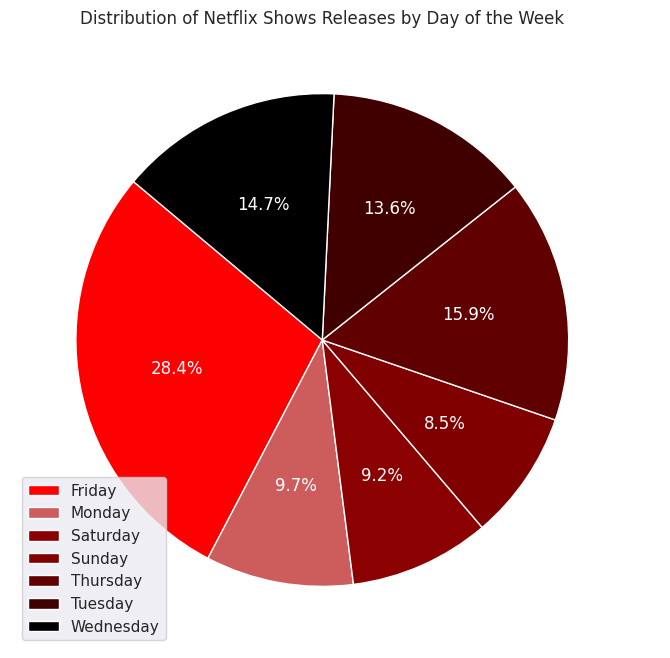

In [ ]:
# Preparing data for the pie chart
days = shows_per_day_of_week.index
counts = shows_per_day_of_week.values

# Define colors (shades of red and black)
colors = ['#FF0000', '#CD5C5C', '#8B0000', '#800000', '#600000', '#400000', '#000000']

# Creating the pie chart with white font color for percentage labels
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=days, colors=colors, autopct=lambda p: f'{p:.1f}%', startangle=140, textprops={'color':"white"})
plt.title('Distribution of Netflix Shows Releases by Day of the Week')
plt.legend()
plt.show()

**Viewer Behavior and Preferences**: Fridays mark the beginning of the weekend in many cultures, suggesting that viewers might be more inclined to start watching new shows or movies at this time. This pattern could indicate that people prefer to engage in leisure activities like watching shows or movies as they wind down from the workweek.

**Strategic Release Scheduling**: Content providers might be releasing more titles on Fridays to capitalize on the increased availability and leisure time of their audience. By aligning their release schedule with viewer availability, they can maximize initial viewership and word-of-mouth publicity over the weekend.

**Weekend Binge-Watching Trends**: The popularity of Friday releases could be linked to binge-watching behavior, where viewers are more likely to watch multiple episodes or even an entire series over the weekend.

### Number of Titles by Type Added Each Year on Netflix

### Finding the Value Counts in Rating

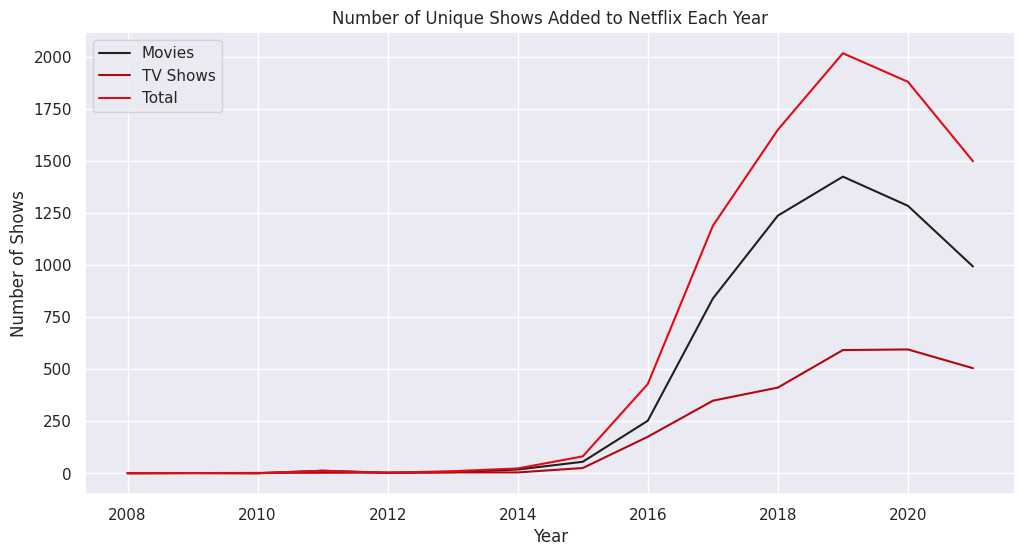

In [ ]:
import matplotlib.pyplot as plt

# Extracting year from the 'date_added' column
netflix['year_added'] = pd.to_datetime(netflix['date_added']).dt.year

# Filtering data for Movies, TV Shows, and Total
movies_data = netflix[netflix['type'] == 'Movie']
tv_shows_data = netflix[netflix['type'] == 'TV Show']

# Counting unique shows per year for each category
unique_movies_per_year = movies_data.groupby('year_added')['show_id'].nunique()
unique_tv_shows_per_year = tv_shows_data.groupby('year_added')['show_id'].nunique()
unique_total_per_year = netflix.groupby('year_added')['show_id'].nunique()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(unique_movies_per_year, color='#221f1f', label='Movies')
plt.plot(unique_tv_shows_per_year, color='#b20710', label='TV Shows')
plt.plot(unique_total_per_year, color='#e50914', label='Total')

plt.title('Number of Unique Shows Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend()
plt.grid(True)
plt.show()

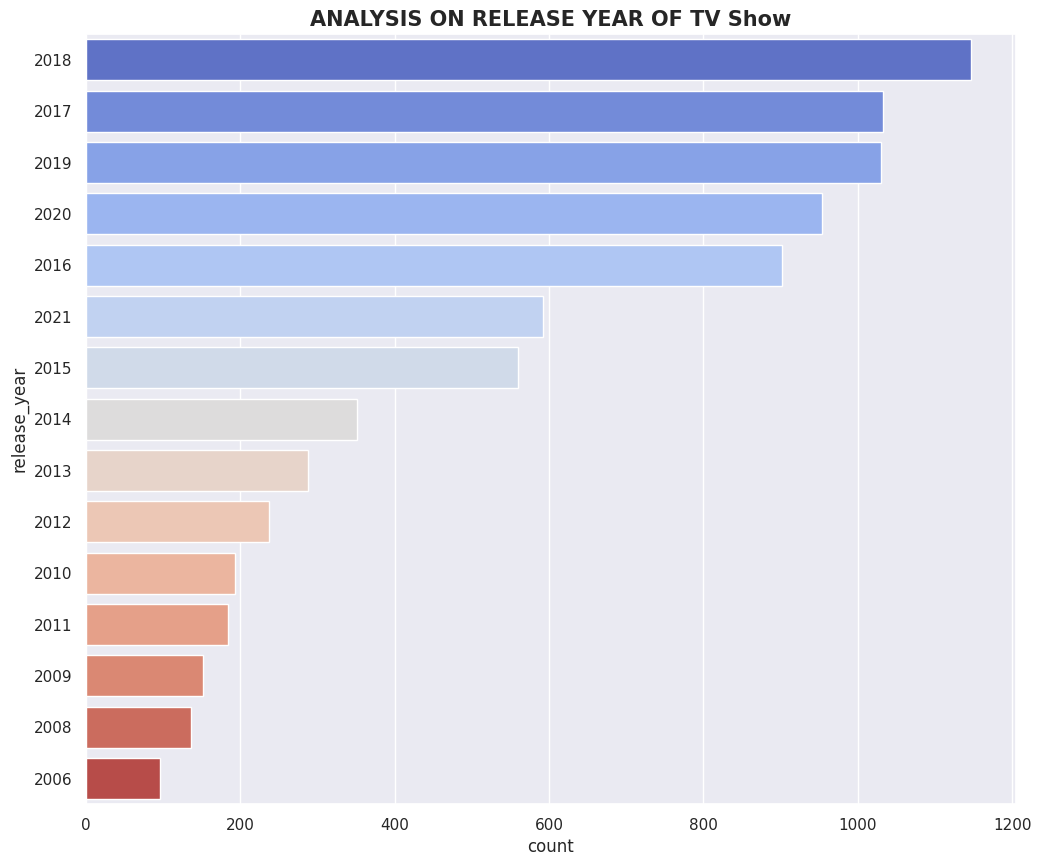

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix, palette="coolwarm", order=netflix['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

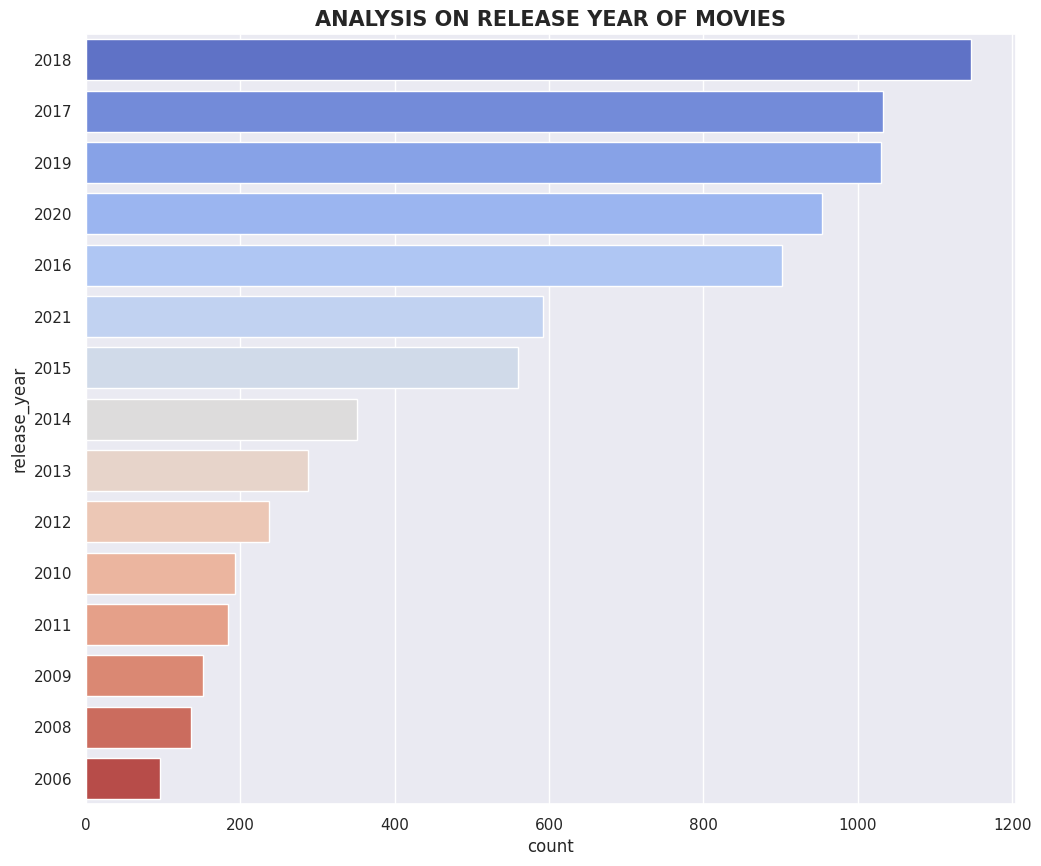

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax=sns.countplot(y="release_year",data=netflix,palette="coolwarm",order=netflix['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

### Finding the Value Counts in Rating

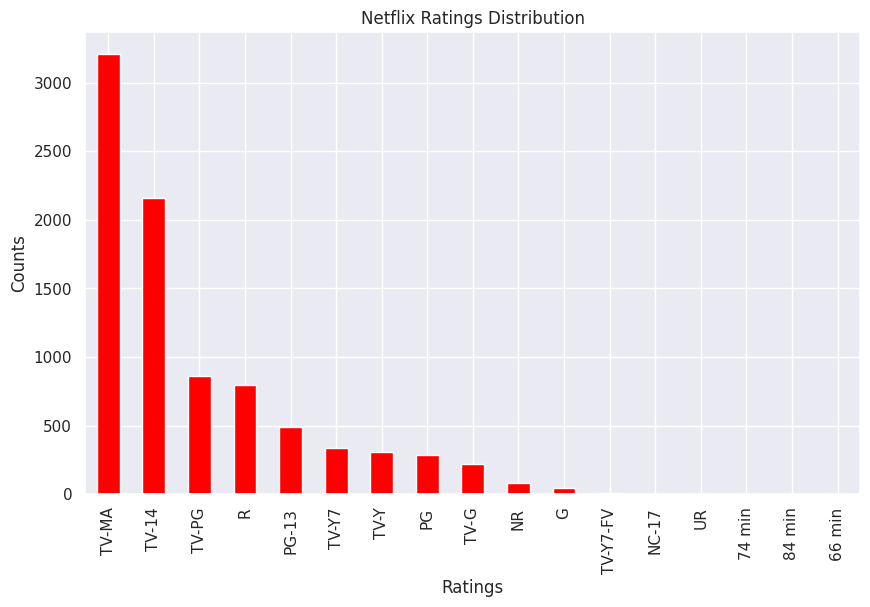

In [ ]:
# Calculate the value counts for 'rating' column
rating_counts = netflix['rating'].value_counts()

# Plotting the bar chart with red color
plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar', color='red')  # Setting the bar color to black
plt.title('Netflix Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

**Popularity of TV-MA and TV-14 Ratings**: The ratings 'TV-MA' (Mature Audience) and 'TV-14' (Suitable for ages 14 and up) are the most common ratings in the dataset. This suggests that a significant portion of Netflix's content is aimed at older teenagers and adults. These ratings imply content that may contain mature themes, strong language, violence, sexual content, or other elements not typically suited for younger audiences.

**Target Audience**: The prevalence of TV-MA and TV-14 ratings indicates that Netflix's target audience includes adults and older teenagers. This could be due to the popularity and demand for more mature and complex storylines, themes, and characters among these age groups.

**Diversity of Content**: While TV-MA and TV-14 are dominant, other ratings like 'TV-PG', 'R', 'PG-13', and 'TV-Y7' are also present, though in smaller quantities. This shows that Netflix offers a range of content suitable for various age groups, including children and families.

**Outliers**- The last three ratings could be typos or data inconsistencies as they are not actual ratings.

### Un-Nesting Columns

In [ ]:
# Creating a function to un-nest a dataframe based on a specific column
def unnest_dataframe(df, column):
    return (
        df.drop(column, axis=1)
        .join(
            df[column].str.split(',', expand=True)
            .stack()
            .reset_index(level=1, drop=True)
            .rename(column)
        )
    )

# Un-nesting the 'cast' column
unnested_cast = unnest_dataframe(netflix, 'cast')

# Un-nesting the 'country' column
unnested_country = unnest_dataframe(netflix, 'country')

# Un-nesting the 'listed_in' (genre) column
unnested_listed_in = unnest_dataframe(netflix, 'listed_in')

# Un-nesting the 'director' column
unnested_director = unnest_dataframe(netflix, 'director')

# Showing the first few rows of the un-nested dataframes
unnested_cast.head(), unnested_country.head(), unnested_listed_in.head(), unnested_director.head()

(  show_id     type                 title         director        country  \
 0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson  United States   
 1      s2  TV Show         Blood & Water              NaN   South Africa   
 1      s2  TV Show         Blood & Water              NaN   South Africa   
 1      s2  TV Show         Blood & Water              NaN   South Africa   
 1      s2  TV Show         Blood & Water              NaN   South Africa   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 
                                          listed_in  \
 0                                    Documentaries   
 1  International TV Shows, TV Dramas, TV Mysteries   
 1  International TV 

 Replacing NaN Values with Unknown_Column_Name

In [ ]:
# Updating null values in categorical columns with 'Unknown [column_name]'

# List of categorical columns to update
categorical_columns = ['director', 'cast', 'country', 'listed_in', 'rating']

# Looping through each column and updating null values
for column in categorical_columns:
    unknown_label = f'Unknown {column.capitalize()}'
    netflix[column].fillna(unknown_label, inplace=True)

# Displaying the first few rows after updating null values
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


### How Many Titles has each Director Directed?

In [ ]:
unique_titles_per_director = unnested_director.groupby('director')['title'].nunique()

# Displaying the result
unique_titles_per_director.sort_values(ascending=False).head(15)

director
Rajiv Chilaka          22
 Jan Suter             18
Raúl Campos            18
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
Steven Spielberg       11
Don Michael Paul       10
Shannon Hartman         9
David Dhawan            9
Yılmaz Erdoğan          9
Name: title, dtype: int64

### Counting Unique Titles in Each Country

In [ ]:
# Counting the number of unique titles in each country using the unnested_country dataframe
unique_titles_per_country = unnested_country.groupby('country')['show_id'].nunique()

# Sorting the result in descending order
unique_titles_per_country_sorted = unique_titles_per_country.sort_values(ascending=False)

# Displaying the result
unique_titles_per_country_sorted

country
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
Cameroon             1
 Lithuania           1
Paraguay             1
 Liechtenstein       1
Zimbabwe             1
Name: show_id, Length: 197, dtype: int64

In [ ]:
# I have tried an alternative method to count unique titles in each country

# Creating a list of all countries mentioned for each title
netflix['countries_list'] = netflix['country'].str.split(',')

# Expanding this list into rows
expanded_countries = netflix.explode('countries_list')

# Stripping any leading/trailing whitespace from the country names
expanded_countries['countries_list'] = expanded_countries['countries_list'].str.strip()

# Now, we group by 'countries_list' and count unique 'show_id' (titles)
unique_title_counts = expanded_countries.groupby('countries_list')['show_id'].nunique().sort_values(ascending=False)

unique_title_counts.head(10)  # Displaying the top 10 countries with the most unique titles

countries_list
United States      3690
India              1046
Unknown Country     831
United Kingdom      806
Canada              445
France              393
Japan               318
Spain               232
South Korea         231
Germany             226
Name: show_id, dtype: int64

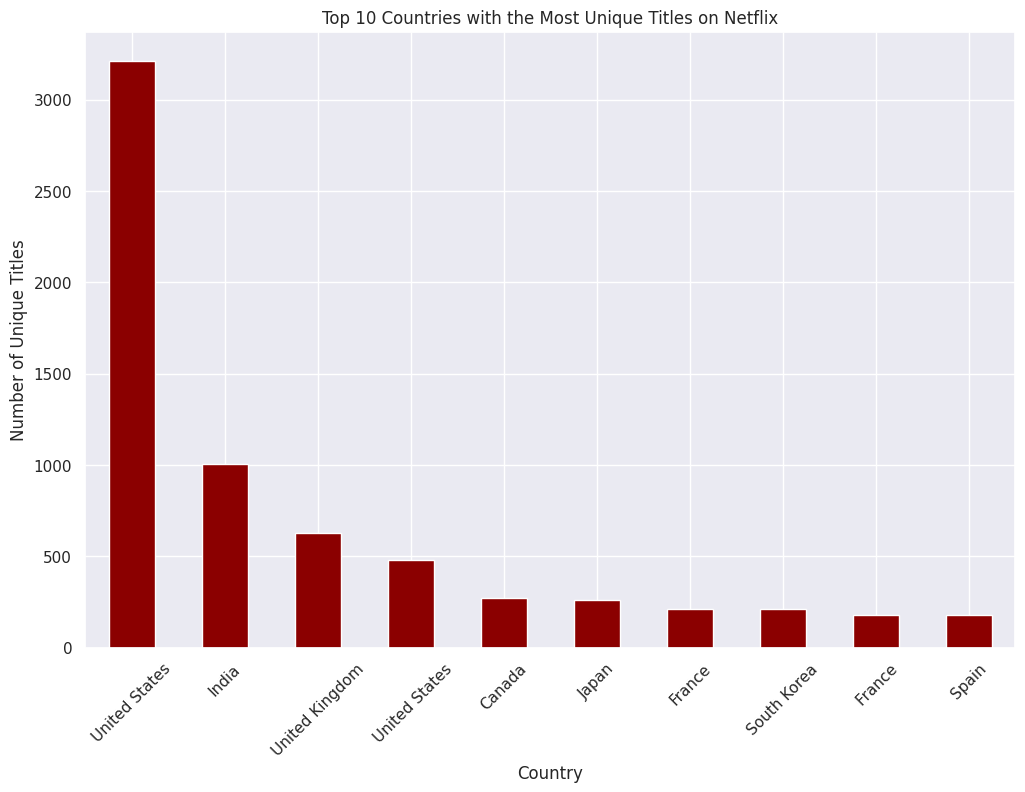

In [ ]:
import matplotlib.pyplot as plt

# Creating a bar plot for the number of unique titles available in each country
plt.figure(figsize=(12, 8))
unique_titles_per_country_sorted.head(10).plot(kind='bar', color='#8B0000')

# Adding plot title and labels
plt.title('Top 10 Countries with the Most Unique Titles on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=45)  # Rotating the country names for better readability

# Displaying the plot
plt.show()

### Country-wise Percentage of Movies & TV Shows

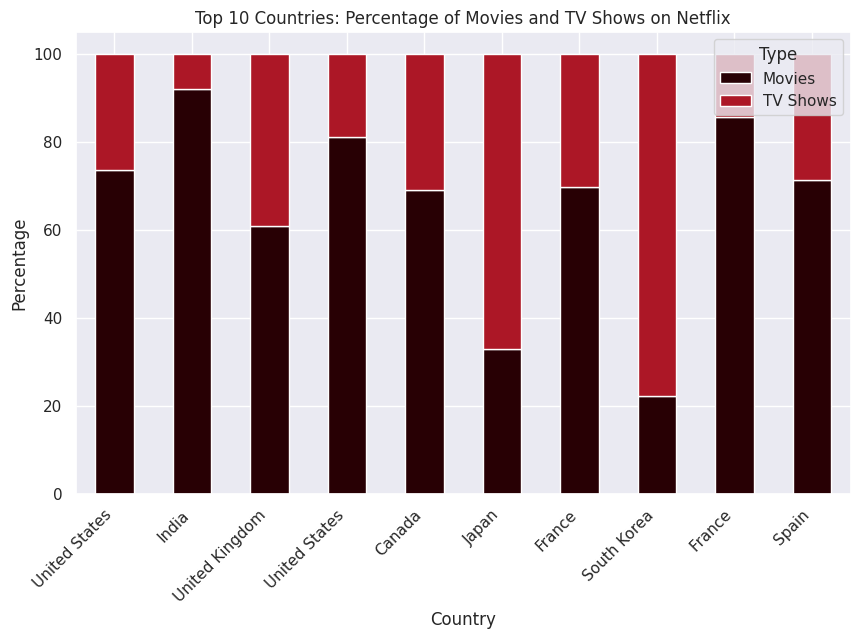

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out 'Unknown Country'
filtered_country_data = unnested_country[unnested_country['country'] != 'Unknown Country']

# Counting the number of Movies and TV Shows for each country
country_type_counts = filtered_country_data.groupby(['country', 'type']).size().unstack().fillna(0)

# Calculating total counts for each country to find the top 10
top_countries = country_type_counts.sum(axis=1).sort_values(ascending=False).head(10)

# Filtering data to include only top 10 countries
top_country_data = country_type_counts.loc[top_countries.index]

# Calculating percentage
top_country_data_percentage = top_country_data.div(top_country_data.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))
top_country_data_percentage.plot(kind='bar', stacked=True, color=['#280004', '#ac1726'], ax=plt.gca())
plt.title('Top 10 Countries: Percentage of Movies and TV Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Type', labels=['Movies', 'TV Shows'])
plt.xticks(rotation=45, ha='right')
plt.show()

The distribution of movies versus TV shows in different countries can be influenced by a variety of factors, including cultural preferences, production and distribution economics, and the historical development of the entertainment industry within each country. Here are some possible explanations:

**Language and Localization**: Movies may be more universally accessible due to the lower cost of dubbing or subtitling a single film compared to a TV series with multiple episodes. This can make movies a more attractive export and lead to a higher production volume in countries focusing on international distribution.

**Industry Structure**: The historical development of the film and television industry in a country can influence the present-day balance. For example, Hollywood in the United States has long been a movie powerhouse, which may contribute to the U.S. having a high number of movies. Similarly, the Bollywood Industry in India has mostly created cinematic movies for the Indian audience. Meanwhile, countries like South Korea have gained international recognition for their TV dramas.

**Distribution Channels**: The rise of streaming services has changed the landscape significantly, making it easier for TV shows to reach a global audience. This may lead to an increase in TV show production as producers seek to capitalize on the international distribution opportunities offered by these platforms.

**Content Exporting**: The global success of certain types of content from specific countries (e.g., Bollywood movies from India, anime TV shows from Japan, or telenovelas from Latin America) can lead to a focus on those formats that have proven to be successful exports.

### The Most Appeared Cast Member on Netflix

In [ ]:
# Stripping any leading/trailing whitespace from the cast names
unnested_cast['cast'] = unnested_cast['cast'].str.strip()

# Grouping by 'cast' and counting unique 'show_id' (titles)
unique_cast_titles_count = unnested_cast.groupby('cast')['show_id'].nunique().sort_values(ascending=False)

unique_cast_titles_count.head(10)  # Displaying the top 10 cast members with the most unique titles

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: show_id, dtype: int64

### What's the Average Duration of a Movie?

In [ ]:
# Filtering out movies
movies_data = netflix[netflix['type'] == 'Movie'].copy()  # Added .copy()

# Extracting the duration in minutes
movies_data['duration_min'] = movies_data['duration'].str.extract('(\d+)').astype(float)

# Calculating the mean and median duration of movies
mean_duration = movies_data['duration_min'].mean()
median_duration = movies_data['duration_min'].median()

mean_duration, median_duration

(99.57718668407311, 98.0)

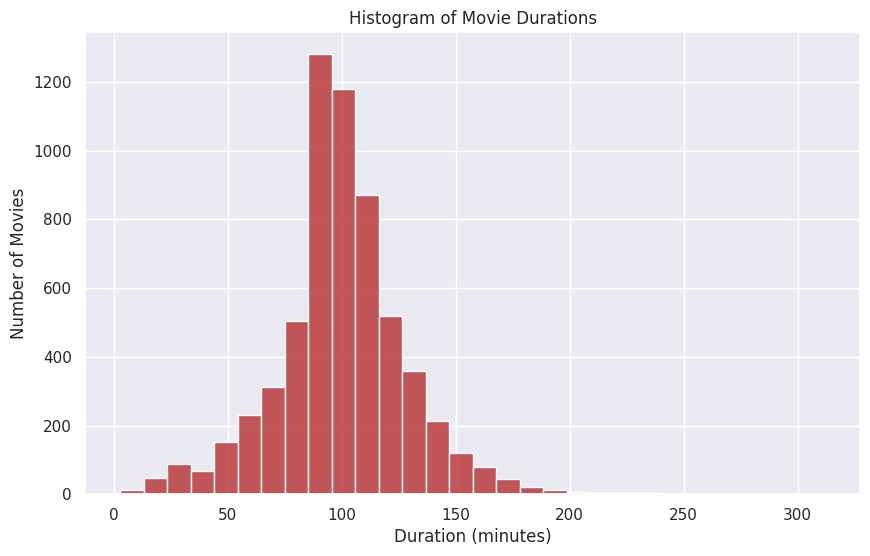

In [ ]:
#Visualizing a histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the numeric part of the duration for movies
# Create a copy to avoid the warning
movies_data = netflix[netflix['type'] == 'Movie'].copy()
movies_data['duration_numeric'] = movies_data['duration'].str.extract('(\d+)')

# Convert to float first to handle NaN values
movies_data['duration_numeric'] = movies_data['duration_numeric'].astype(float)

# Dropping NaN values
movies_data = movies_data.dropna(subset=['duration_numeric'])

# Now safely convert to integer
movies_data['duration_numeric'] = movies_data['duration_numeric'].astype(int)

# Creating a histogram for the duration of movies
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['duration_numeric'], bins=30, kde=False, color='#B22222')
plt.title('Histogram of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

# And for the tv_shows_data (if it is a slice of another DataFrame)
tv_shows_data = tv_shows_data.copy()  # Create a copy to avoid the warning
tv_shows_data['month'] = tv_shows_data['date_added'].dt.month

### How Many Seasons on Average does a TV Show Last for?

In [ ]:
# Filtering out TV shows and creating an independent copy
tv_shows_data = netflix[netflix['type'] == 'TV Show'].copy()

# Extracting the number of seasons
tv_shows_data['seasons_count'] = tv_shows_data['duration'].str.extract('(\d+)').astype(float)

# Calculating the mean and median number of seasons
mean_seasons = tv_shows_data['seasons_count'].mean()
median_seasons = tv_shows_data['seasons_count'].median()

mean_seasons, median_seasons

(1.764947683109118, 1.0)

In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = netflix['rating'].value_counts()[rating_order_movie]
tv_rating = netflix['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

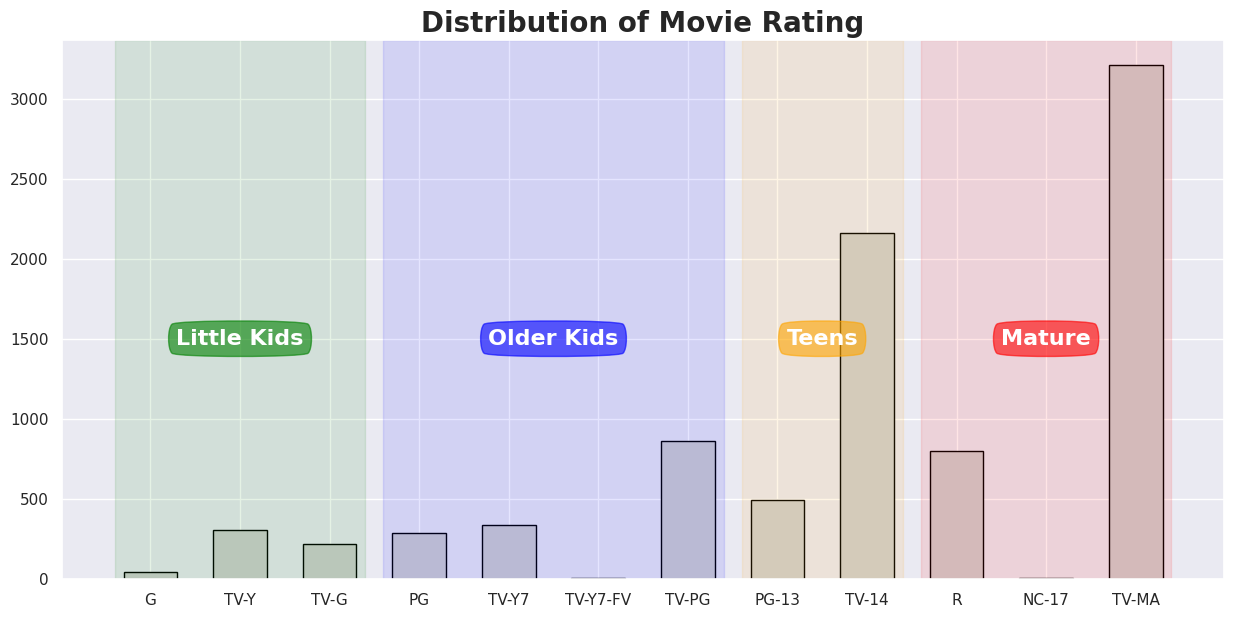

In [ ]:
rating_barplot(movie_rating,'Movie', 1500)

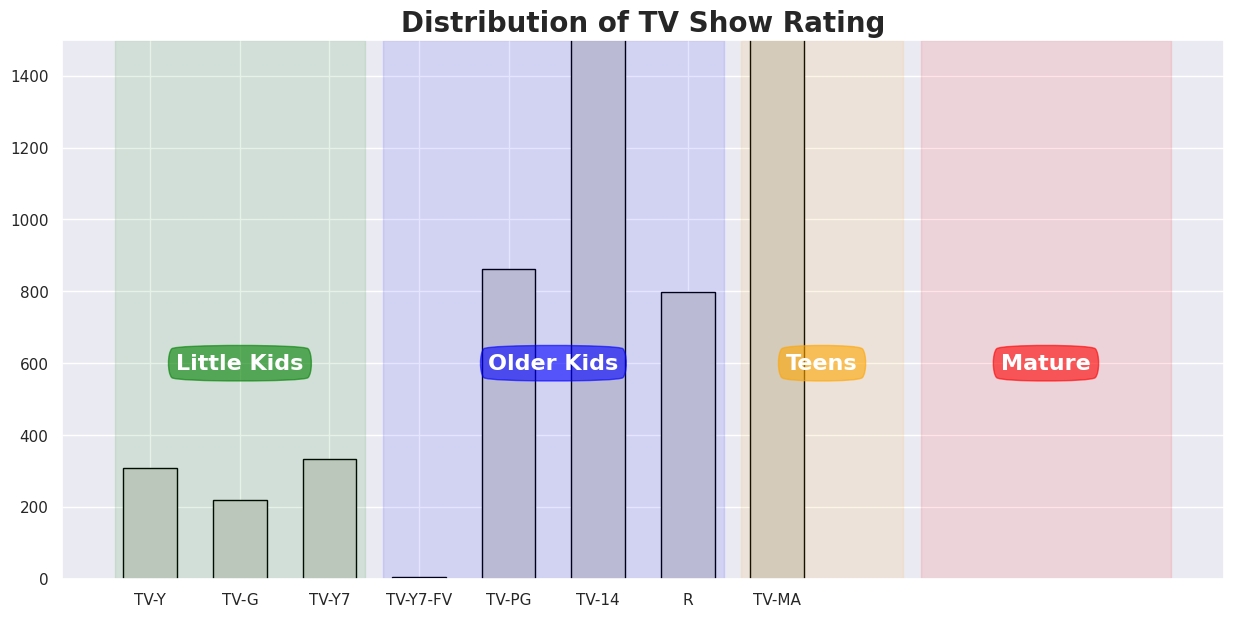

In [ ]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)

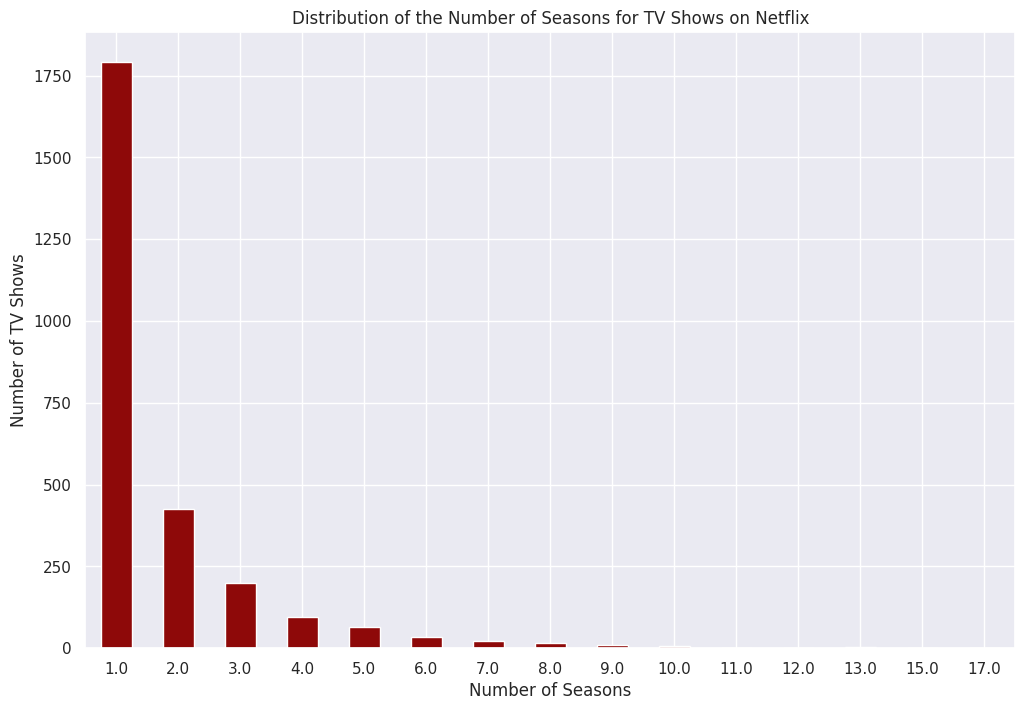

In [ ]:
# Performing value counts on the number of seasons in the 'duration' column for TV shows
# and ensuring we are only considering unique TV shows.

# Grouping by 'show_id' to ensure each TV show is counted only once
unique_tv_shows = tv_shows_data.drop_duplicates(subset='show_id')

# Value counts of the number of seasons
seasons_counts = unique_tv_shows['seasons_count'].value_counts().sort_index()

# Creating a bar plot for the value counts of the number of seasons in TV shows
plt.figure(figsize=(12, 8))
seasons_counts.plot(kind='bar', color='#8e0909')

# Adding plot title and labels
plt.title('Distribution of the Number of Seasons for TV Shows on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=0)  # Keeping the season labels horizontal for better readability

# Displaying the plot
plt.show()

### Top 10 Genres

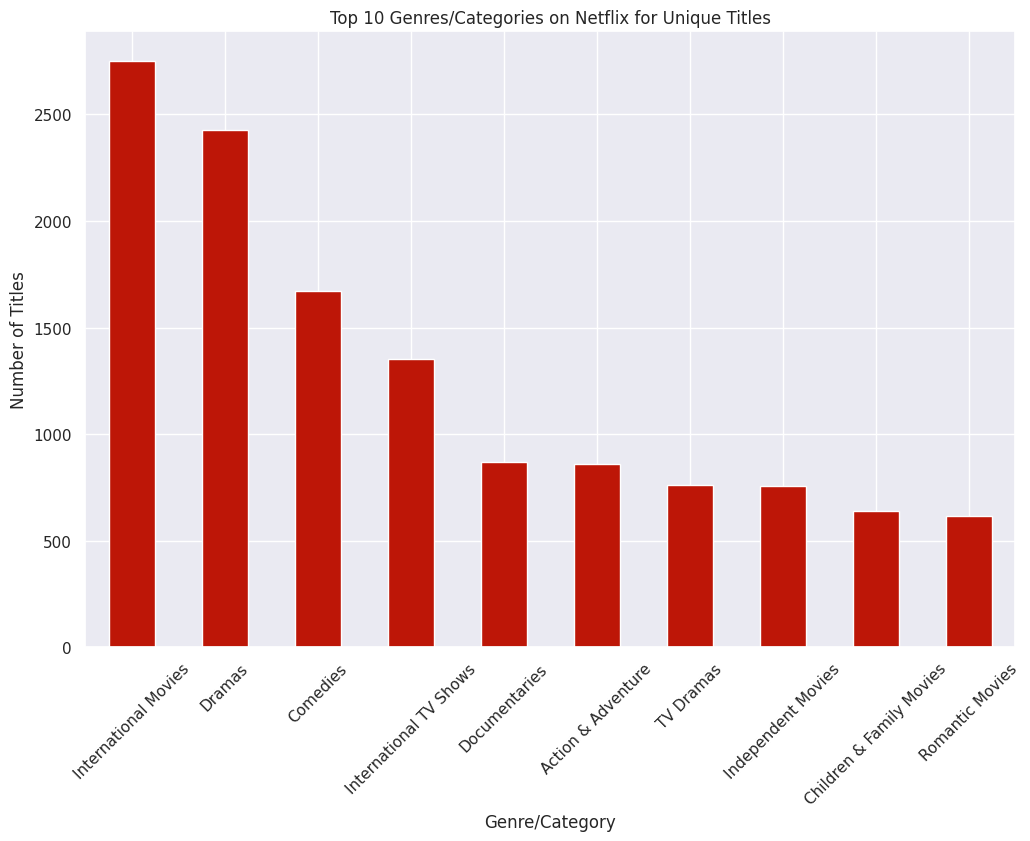

In [ ]:
# Un-nesting the 'listed_in' (genre) column
unnested_listed_in = unnest_dataframe(netflix, 'listed_in')

# Stripping any leading/trailing whitespace from the genre names
unnested_listed_in['listed_in'] = unnested_listed_in['listed_in'].str.strip()

# Ensuring we are only considering unique titles
unique_listed_in = unnested_listed_in.drop_duplicates(subset=['show_id', 'listed_in'])

# Value counts of genres/categories
genre_counts = unique_listed_in['listed_in'].value_counts().sort_values(ascending=False)

# Creating a bar plot for the value counts of categories/genres for unique titles in Netflix
plt.figure(figsize=(12, 8))
genre_counts.head(10).plot(kind='bar', color='#bd1607')

# Adding plot title and labels
plt.title('Top 10 Genres/Categories on Netflix for Unique Titles')
plt.xlabel('Genre/Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)  # Rotating the genre labels for better readability

# Displaying the plot
plt.show()

### Which Genre of Movies is more popular?

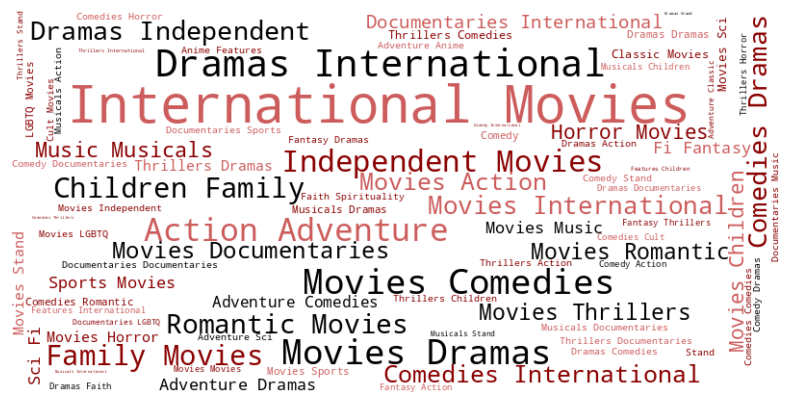

In [ ]:
from wordcloud import WordCloud

# Filtering the dataset for movies
movies_genre_data = unnest_dataframe(movies_data, 'listed_in')

# Stripping any leading/trailing whitespace from the genre names
movies_genre_data['listed_in'] = movies_genre_data['listed_in'].str.strip()

# Creating a single string of all movie genres
all_genres = ' '.join(movies_genre_data['listed_in'])

# Custom color function to incorporate shades of red and black
def red_black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#CD5C5C', '#8B0000', '#000000']  # Shades of red and black
    return colors[random_state.randint(0, len(colors)-1)]

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color ='white', color_func=red_black_color_func).generate(all_genres)

# Displaying the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### After How Many Days (on Average) is a Title Added to Netflix After its Initial Release?

In [ ]:
# Converting 'date_added' and 'release_year' to datetime for calculation
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['release_date'] = pd.to_datetime(netflix['release_year'], format='%Y')

# Calculating the difference in days between 'date_added' and 'release_date'
netflix['days_to_add'] = (netflix['date_added'] - netflix['release_date']).dt.days

# Calculating the average time to add a title after its initial release
average_days_to_add = netflix['days_to_add'].mean()
average_days_to_add

1895.3677390019325

### Trends in the Gap Between a Show_id's Release and the Date Added

In [ ]:
# Convert 'date_added' to DateTime format
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

# Extract the year from 'date_added'
netflix['year_added'] = netflix['date_added'].dt.year

# Calculate the gap in years
netflix['release_to_add_gap'] = netflix['year_added'] - netflix['release_year']

# Now let's look at the trend of this gap over the years
gap_trend = netflix.groupby('year_added')['release_to_add_gap'].mean()

gap_trend.dropna()  # Dropping NaN values which might occur due to missing 'date_added' data

year_added
2008.0     1.500000
2009.0     1.000000
2010.0    23.000000
2011.0    19.923077
2012.0     1.000000
2013.0     0.545455
2014.0     3.000000
2015.0     1.341463
2016.0     2.941725
2017.0     3.936027
2018.0     4.122498
2019.0     5.272321
2020.0     4.676424
2021.0     5.750334
Name: release_to_add_gap, dtype: float64

### Comparing the trends between Average Gap in Years Between Release and Addition to Netflix and the Number of Titles Added Each Year (Black Line)

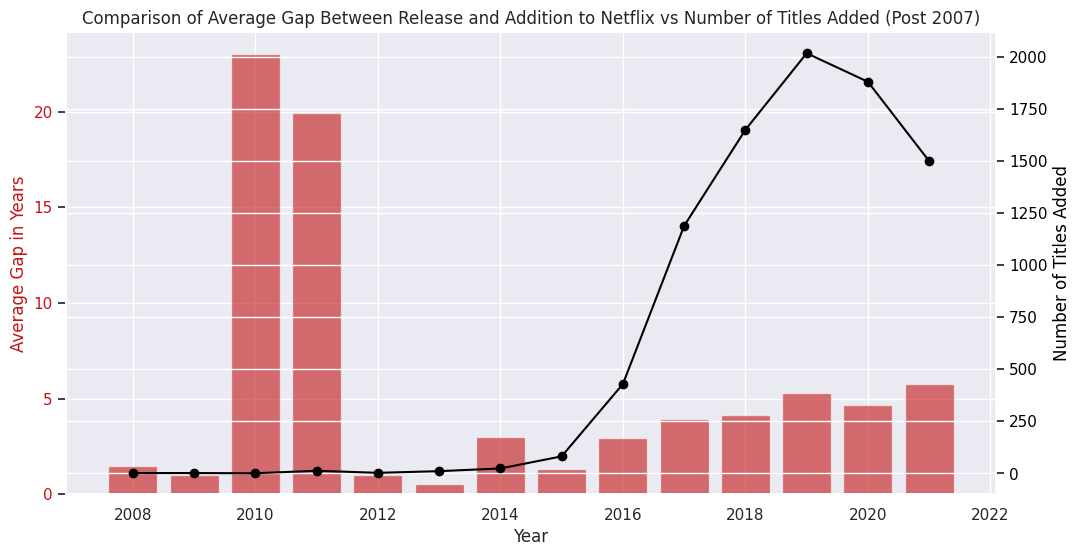

In [ ]:
# Counting the number of titles added each year after 2007
titles_per_year = netflix[netflix['year_added'] > 2007].groupby('year_added')['show_id'].count()

# Plotting both trends for comparison
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the average gap
color = '#c31414'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Gap in Years', color=color)
ax1.bar(gap_trend.index, gap_trend.values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for the number of titles added
ax2 = ax1.twinx()
color = '#000000'
ax2.set_ylabel('Number of Titles Added', color=color)
ax2.plot(titles_per_year.index, titles_per_year.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and showing the plot
plt.title('Comparison of Average Gap Between Release and Addition to Netflix vs Number of Titles Added (Post 2007)')
plt.show()


From the bar chart data, a few trends and observations can be noted:

**Increasing Gap Over Time**: There's a general trend of an increasing gap from around 2015 onwards. This suggests that Netflix has been adding older titles to its library in recent years.

**Variability in Early Years**: The years 2010 and 2011 show unusually high gaps, which could be due to specific older titles being added in those years, or possibly due to a smaller number of titles added, leading to higher variability.

**Stabilization in Recent Years**: In the most recent years (2018-2021), the gap seems to stabilize around 4 to 6 years, indicating a more consistent strategy in content acquisition and addition.

**Content Acquisition Strategy**: The increasing gap in later years, coupled with the increasing number of titles, suggests a strategy shift where Netflix started to focus more on diversifying its library with a mix of new and older content.

**Market Dynamics and Competition**: This trend could also be influenced by market dynamics, such as increased competition from other streaming services and changes in content licensing agreements, prompting Netflix to adjust its content acquisition strategy.

### Prevalence of Certain Genres in Different Countries

In [ ]:
# Identifying the prevalence of certain genres in different countries
# We'll aggregate the genres for each country and then count the occurrences of each genre in those countries

# Creating a new DataFrame with 'country' and 'listed_in' columns
country_genre_df = netflix[['country', 'listed_in']].dropna()

# Splitting the 'listed_in' column into individual genres and then exploding it for easier counting
country_genre_df['listed_in'] = country_genre_df['listed_in'].str.split(', ')
country_genre_df = country_genre_df.explode('listed_in')

# Grouping by country and genre and counting occurrences
genre_prevalence = country_genre_df.groupby(['country', 'listed_in']).size().unstack(fill_value=0)

# Sorting genres by prevalence in each country
sorted_genre_prevalence = genre_prevalence.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

sorted_genre_prevalence.head()  # Displaying the first few rows as an example

country
, France, Algeria                                      Index(['International Movies', 'Independent Mo...
, South Korea                                          Index(['International TV Shows', 'TV Dramas', ...
Argentina                                              Index(['International Movies', 'Spanish-Langua...
Argentina, Brazil, France, Poland, Germany, Denmark    Index(['Thrillers', 'International Movies', 'D...
Argentina, Chile                                       Index(['International Movies', 'Dramas', 'Inde...
dtype: object

### Exploring potential correlations in the relationship between a unique title's rating (like TV-MA, TV-PG) and its genre or duration.

In [ ]:
# We'll use the unnested version of the 'listed_in' column for this analysis
# Also, we'll need to convert 'duration' into a numeric value for movies
movies_data['duration_numeric'] = movies_data['duration'].str.extract('(\d+)').astype(float)

# Exploring the relationship between a movie's rating and its genre
genre_rating = unnest_dataframe(movies_data, 'listed_in').groupby(['rating', 'listed_in']).size().unstack().fillna(0)

# Exploring the relationship between a movie's rating and its duration
duration_rating = movies_data.groupby('rating')['duration_numeric'].mean()

genre_rating, duration_rating

(listed_in        Anime Features   Children & Family Movies   Classic Movies  \
 rating                                                                        
 G                           0.0                        0.0              4.0   
 NC-17                       0.0                        0.0              0.0   
 NR                          0.0                        0.0              0.0   
 PG                          1.0                       16.0             12.0   
 PG-13                       2.0                        9.0              4.0   
 R                           0.0                        0.0              8.0   
 TV-14                      20.0                        1.0              4.0   
 TV-G                        0.0                        1.0              1.0   
 TV-MA                      14.0                        0.0              1.0   
 TV-PG                      13.0                        4.0              2.0   
 TV-Y                        0.0        

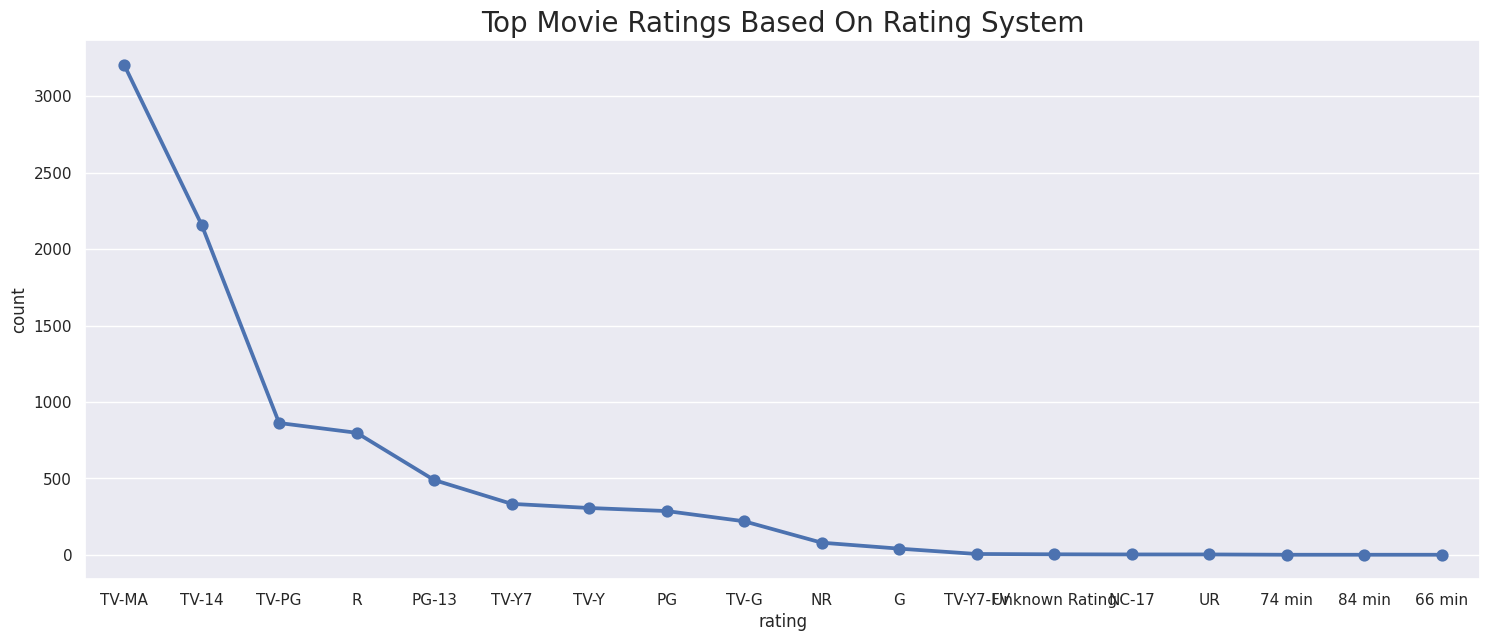

In [ ]:
movie_ratings=netflix.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig_dims=(18,7)

fig,ax=plt.subplots(figsize=fig_dims)

sns.pointplot(x='rating',y='count',data=movie_ratings)

plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

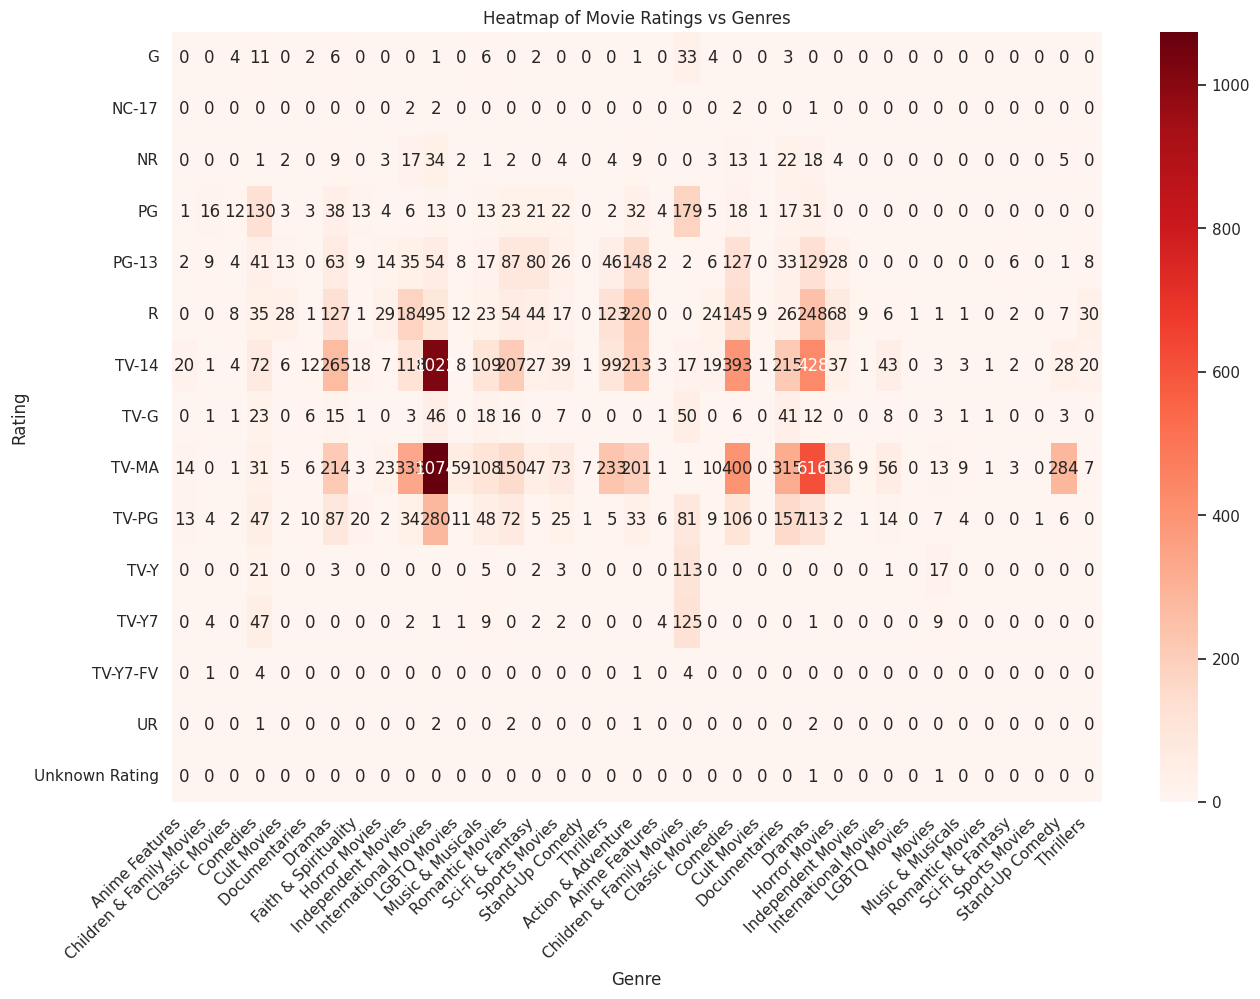

In [ ]:
# Creating a heatmap for the relationship between movie rating and genre
plt.figure(figsize=(15, 10))
sns.heatmap(genre_rating, cmap='Reds', annot=True, fmt=".0f")
plt.title('Heatmap of Movie Ratings vs Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Note: The heatmap represents the count of movies in each genre-rating combination.
# Higher counts are represented by darker shades of red.

**Marketing and Promotion**: Knowing which genres are popular in certain rating categories can inform targeted marketing and promotional strategies. For example, promoting family-friendly genres in regions with a high number of subscribers with children.

**Content Strategy and Planning**: Understanding which genres are prevalent in certain ratings can help Netflix in content acquisition and production planning. For example, if there's a high number of 'Dramas' in the 'TV-MA' category, it might indicate a demand for more mature, complex narratives, guiding Netflix to invest in similar content.

**Viewer Preferences and Trends**: The genre-rating relationship can reveal viewer preferences and trends. For instance, a surge in 'Horror' movies with 'R' rating might reflect an increased interest in adult-themed horror content.

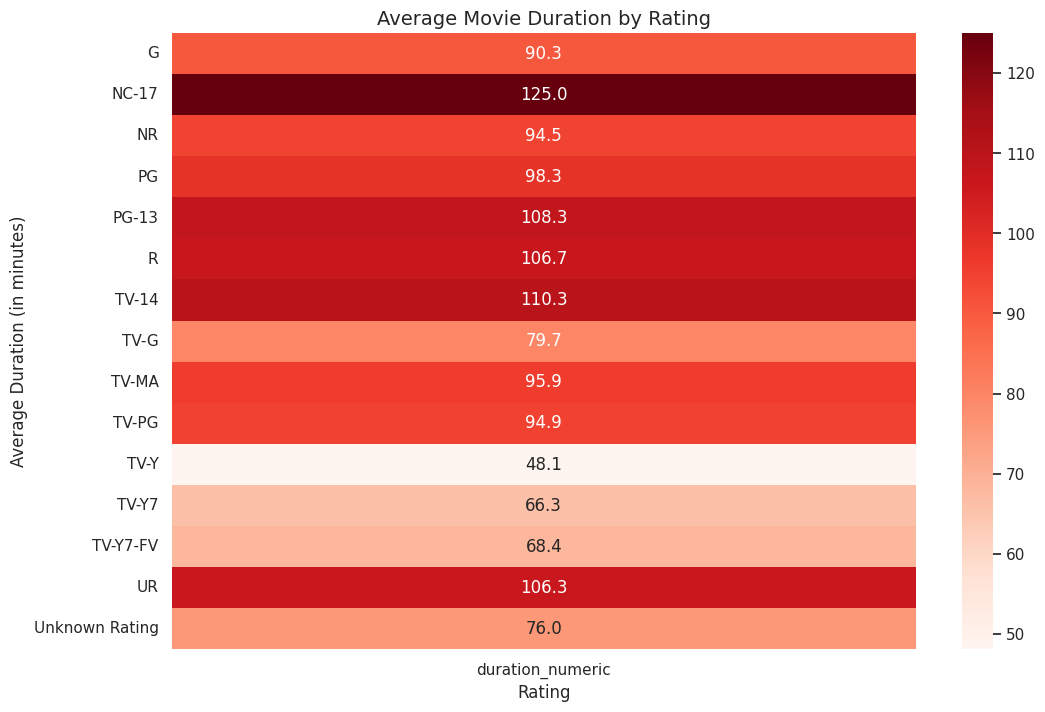

In [ ]:
# Convert the Series to a DataFrame
duration_rating_df = duration_rating.reset_index()

# Setting up the figure with a larger size for better readability
plt.figure(figsize=(12, 8))

# Creating the heatmap
# Since now 'duration_rating_df' is a DataFrame, we can use it directly
sns.heatmap(duration_rating_df.set_index('rating'), cmap='Reds', annot=True, fmt=".1f", annot_kws={'size': 12})

# Setting the title and labels with increased font size
plt.title('Average Movie Duration by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Duration (in minutes)', fontsize=12)

# Showing the heatmap
plt.show()

**Longer Movies in Certain Ratings**:

* Ratings like 'NC-17' and 'R' show longer average durations. This could indicate that more mature content (often found in these categories) tends toward longer storytelling formats.

**Shorter Movies in Family-Friendly Ratings**:

* Ratings like 'G', 'TV-Y', and 'TV-Y7' have shorter average durations. This aligns with the expectation that content aimed at younger audiences is often shorter to match their attention spans.

**Consistency in Popular Ratings**:

* Ratings like 'PG', 'PG-13', and 'TV-MA' show a consistent average duration around 90-110 minutes, typical for feature films.

###  Average Duration of Movies across Different Genres

In [ ]:
# Handling NaN values in 'duration' column
# It's possible that some movie durations are not provided, so we'll replace NaNs with the mean duration
mean_duration = movies_data['duration'].str.replace(' min', '').astype(float).mean()
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').fillna(mean_duration).astype(int)

# Repeating the un-nesting and averaging process
unnested_genre = unnest_dataframe(movies_data, 'listed_in')
average_duration_per_genre = unnested_genre.groupby('listed_in')['duration'].mean().reset_index()
average_duration_per_genre.sort_values(by='duration', ascending=False)

,listed_in,duration
2,Classic Movies,127.138889
6,Dramas,116.288996
21,Classic Movies,114.825000
18,Action & Adventure,113.515716
25,Dramas,111.377500
13,Romantic Movies,110.706362
10,International Movies,110.461509
17,Thrillers,108.082031
28,International Movies,108.062500
12,Music & Musicals,106.960784


In [ ]:
import plotly.express as px
import pandas as pd


# Import data from USGS
df = pd.read_csv("netflix.csv")
df['country'] = df['country'].str.split(',').str[0]  # Extracting the first country in case of multiple countries
df['country'] = df['country'].str.strip()  # Remove leading/trailing whitespaces
# Count the number of titles per country
content_by_country = df['country'].value_counts().reset_index()
content_by_country.columns = ['Country', 'Number of Titles']
fig = px.choropleth(content_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='Number of Titles',
                    title='Content Availability by Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template='plotly_dark')

fig.show()


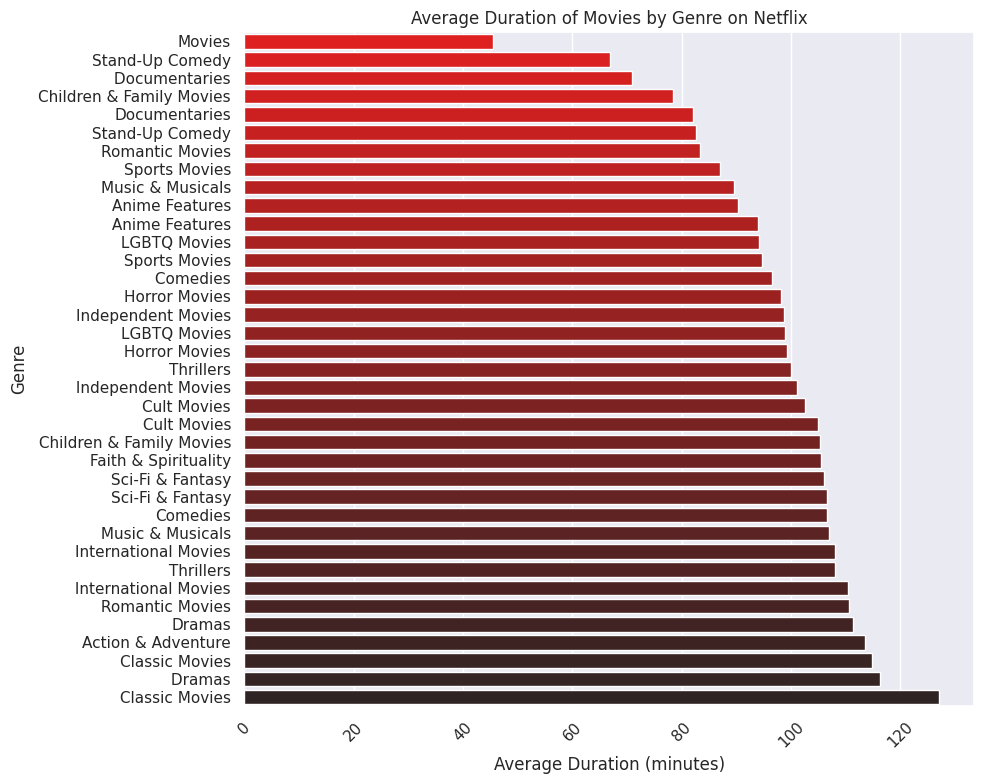

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sorting the data for a better plot
sorted_data = average_duration_per_genre.sort_values(by='duration', ascending=True)

# Setting the color palette to shades of red and black
palette = sns.color_palette("dark:red_r", len(sorted_data))

# Creating the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="duration", y="listed_in", data=sorted_data, palette=palette)
plt.title('Average Duration of Movies by Genre on Netflix')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

**Genre-Specific Duration Trends**:

* **Classic Movies and Dramas tend to have longer durations**. This could be attributed to the narrative depth and character development often required in these genres.

* **Documentaries and Stand-Up Comedy typically have shorter durations**. Documentaries may aim for conciseness to effectively deliver factual content, while stand-up comedy specials are generally shorter to maintain audience engagement.

**Viewer Preferences and Consumption Patterns**:

* Shorter durations in genres like documentaries might align with viewers'
preferences for concise, informative content that can be consumed in a single sitting.

* Longer films in genres like dramas and classic movies might be more appealing to viewers who prefer in-depth storytelling and are willing to commit more time to a single movie.

### Recommendations:

**Strategic Release Timing**: The time series analysis of content added could guide Netflix in optimizing the timing of new releases. Understanding seasonal patterns or specific times when subscribers are more likely to watch new content can help in planning release schedules. According to my Analysis, Fridays are the most popular day for releases; week 1 is the most popular for Movies and week 27 is the most popular for TV Shows. July is the best month to release a Movie and December is the best month to release a TV Show.

**Expand Popular Genres in Key Ratings**: If certain genres are performing well in specific rating categories, consider increasing the production or acquisition of similar content to cater to the established audience. For instance, TV-MA & TV-14 in International Movies and TV-MA in Dramas is a very popular rating-genre pair.

**Genre-Specific Rating Strategy**: The analysis of movie duration by rating suggests that different rating have different average durations. Netflix could use this information to guide the production of content, ensuring that the length of movies or shows aligns with audience expectations for each rating. For instance, NC-17 audience watch longer movies, averaging around 125 minutes whereas TV-Y prefers shorter durations since it caters to children.

**Diversify Genres**: While international movies, dramas and comedies are popular, there's potential in diversifying into other genres to cater to a wider range of preferences. This could include more documentaries, action, and independent films, TV dramas and romantic movies.

**Balance Between Movies and TV Shows**: Since most audience members prefer to watch movies than TV Shows, maintaining a balance with movie content is essential. This caters to a broader audience, including those who prefer standalone stories.

**Popular Themes in Titles**- The top most frequent words used in the title of movies and TV shows can indicate audience preferences. For instance- Christmas, love, man, world are popular words used in titles which reflects viewer interests and industry patterns. Knowledge of popular words in titles can inform marketing strategies and title creation, potentially increasing the appeal and discoverability of new movies.

**Monitor and Adapt to External Factors**: The decrease in content in 2021 could be attributed to external factors like the COVID-19 pandemic. Being agile and adaptive in content strategy in response to such external influences is essential.

**Targeted Marketing and Recommendations**: Understanding the popularity of certain genres, directors, or cast members can help in tailoring marketing strategies and personalized recommendations to subscribers, potentially increasing viewer engagement. According to the analysis shown, Rajiv Chilaka,
Raúl Campos, Jan Suter are directors who directed the most titles and Anupam Kher, Shah Rukh Khan, Julie Tejwani, Takahiro Sakurai, Naseeruddin Shah, Rupa Bhimani are cast member who appeared in the most titles.

**Content Planning and Development and User Engagement**: For content creators and distributors, understanding the average duration helps in planning and producing content that aligns with audience expectations and viewing habits. For instance, if the average movie duration is 99 minutes, this might suggest an optimal length for audience engagement. Netflix can use this data to tailor recommendations. If a user frequently watches movies of around 100 minutes, Netflix might prioritize similar-length movies in their recommendations.

**Enhance Personalization Algorithms**: With a growing library, improving content recommendation algorithms is crucial. Personalized recommendations should consider not just viewers' past preferences but also their potential interest in older titles they might not have discovered yet.




